# Bias and Variance

Suppose we have a dataset $\mathcal{D} = \lbrace x_{m} \in \mathbb{R}^{N}, y_{m} \in \mathbb{R}^{C}\rbrace$, where $x_{m}$ are the collected data, or observations, and $y_{m}$ are the label assigned to each m-th measurement. Let $\hat{y}$ be an estimator of the quantity $y$, i.e., it is a function of the data $x_{m}$.

When we choose an estimator there are some important properties we should know that are linked to underfitting and overfitting: bias and variance.
Bias is a measure of how far from the real $y$ the expectation of $\hat{y}$, $\mathbb{E}\left[ \hat{y} \right]$, is. Variance, on other hand is a measure of how much it is expected the estimator to vary, in other terms, how much on average the individual $\hat{y}$ are from from the expectation $\mathbb{E}\left[ \hat{y} \right]$.

These two could seem the same thing, but they are not. Let us visualize some data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

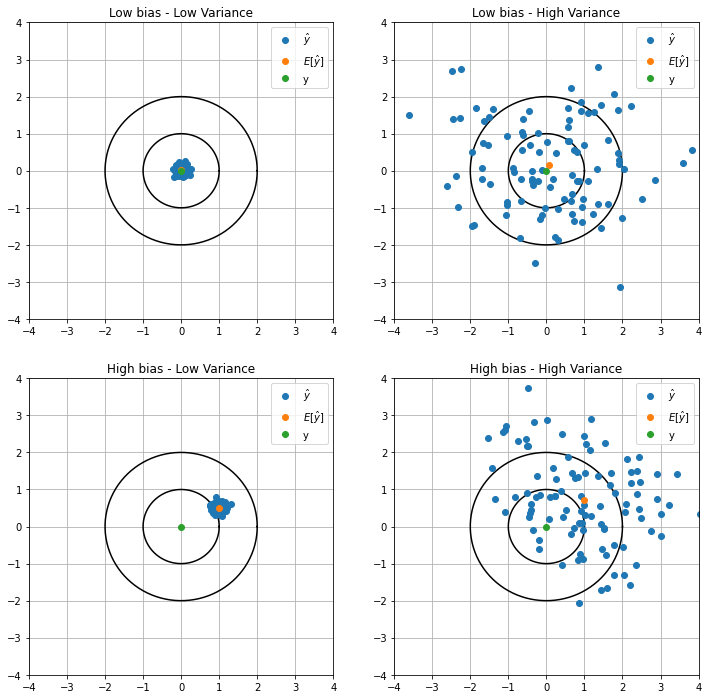

In [50]:
bias = [[0.0,0.0], [1.0,0.5]]
var = [[0.01,0.01],[2.0,1.5]]
size = 100
y = 0.0
y_aux_1 = np.cos(np.linspace(0,2*np.pi,100))
y_aux_2 = np.sin(np.linspace(0,2*np.pi,100))

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.title("Low bias - Low Variance")
y_est_1 = np.random.normal(loc=bias[0][0],scale=np.sqrt(var[0][0]),size=size)
y_est_2 = np.random.normal(loc=bias[0][1],scale=np.sqrt(var[0][1]),size=size)
plt.plot(y_aux_1,y_aux_2,color='k')
plt.plot(2*y_aux_1,2*y_aux_2,color='k')
plt.plot(y_est_1,y_est_2,'o',label=r'$\hat{y}$')
plt.plot(np.mean(y_est_1),np.mean(y_est_2),'o',label=r'$E[\hat{y}]$')
plt.plot(y,y,'o',label="y")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.legend(loc=0)
plt.grid(True)
plt.subplot(222)
plt.title("Low bias - High Variance")
y_est_1 = np.random.normal(loc=bias[0][0],scale=np.sqrt(var[1][0]),size=size)
y_est_2 = np.random.normal(loc=bias[0][1],scale=np.sqrt(var[1][1]),size=size)
plt.plot(y_aux_1,y_aux_2,color='k')
plt.plot(2*y_aux_1,2*y_aux_2,color='k')
plt.plot(y_est_1,y_est_2,'o',label=r'$\hat{y}$')
plt.plot(np.mean(y_est_1),np.mean(y_est_2),'o',label=r'$E[\hat{y}]$')
plt.plot(y,y,'o',label="y")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.legend(loc=0)
plt.grid(True)
plt.subplot(223)
plt.title("High bias - Low Variance")
y_est_1 = np.random.normal(loc=bias[1][0],scale=np.sqrt(var[0][0]),size=size)
y_est_2 = np.random.normal(loc=bias[1][1],scale=np.sqrt(var[0][1]),size=size)
plt.plot(y_aux_1,y_aux_2,color='k')
plt.plot(2*y_aux_1,2*y_aux_2,color='k')
plt.plot(y_est_1,y_est_2,'o',label=r'$\hat{y}$')
plt.plot(np.mean(y_est_1),np.mean(y_est_2),'o',label=r'$E[\hat{y}]$')
plt.plot(y,y,'o',label="y")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.legend(loc=0)
plt.grid(True)
plt.subplot(224)
plt.title("High bias - High Variance")
plt.plot(2*y_aux_1,2*y_aux_2,color='k')
y_est_1 = np.random.normal(loc=bias[1][0],scale=np.sqrt(var[1][0]),size=size)
y_est_2 = np.random.normal(loc=bias[1][1],scale=np.sqrt(var[1][1]),size=size)
plt.plot(y_aux_1,y_aux_2,color='k')
plt.plot(y_est_1,y_est_2,'o',label=r'$\hat{y}$')
plt.plot(np.mean(y_est_1),np.mean(y_est_2),'o',label=r'$E[\hat{y}]$')
plt.plot(y,y,'o',label="y")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.legend(loc=0)
plt.grid(True)
plt.show()

The difference now is clear and you should notice that we desire to build an estimator with the lowest bias and variance as possible. Sometimes we have to sacrifice one of them in order to lower the other. Let us define these quantities:

Bias: $bias[\hat{y}] = \mathbb{E}[\hat{y}] - y$

Variance: $var[\hat{y}] = \mathbb{E}\left[ \left( \hat{y} - \mathbb{E}[\hat{y}] \right)^{2} \right]$

A common metric we wish to minimize is the `mean squared error` loss (MSE), we can see that these quantities emerged from its definition:

$$\begin{align*}
MSE [\hat{y}] &= \mathbb{E} \left [ \left ( \hat{y} - y \right )^2 \right ]\\
 &= \mathbb{E} \left [ \hat{y}^{2} + y^{2} - 2\hat{y}y  \right ] \\
 &= \mathbb{E} \left [ \hat{y}^{2} \right] + y^2 - 2\mathbb{E} \left [ \hat{y} \right] \\
 &= \mathbb{E} \left [ \hat{y}^{2} \right] + y^2 - 2\mathbb{E} \left [ \hat{y} \right]y + \mathbb{E} \left [ \hat{y} \right]^{2} - \mathbb{E} \left [ \hat{y} \right]^{2} \\
 &= \mathbb{E} \left [ \hat{y} \right]^{2} + y^{2} - 2\mathbb{E} \left [ \hat{y} \right]y + \mathbb{E} \left [ \hat{y}^{2} \right] - \mathbb{E} \left [ \hat{y} \right]^{2} \\
 &= bias[\hat{y}]^{2} + var[\hat{y}]
\end{align*},$$

where we used:

$$\begin{align*}
bias[\hat{y}]^{2} &= \left( \hat{y} - y \right)^{2} = \mathbb{E} \left [ \hat{y} \right]^{2} + y^{2} -2 \mathbb{E} \left [ \hat{y} \right]y,\\
var[\hat{y}] &=  \mathbb{E} \left [ \hat{y}^{2} \right] +  \mathbb{E} \left [ \hat{y} \right]^{2} -2  \mathbb{E} \left [ \hat{y} \right]^{2}, \\
\mathbb{E}[y] &= y,\\
\text{and }\mathbb{E}[y^{2}] &= y^{2}
\end{align*}$$

Losses functions like MSE are good because the optimization process minimizes both bias and variance, i.e., they are both part of the generalization error.

### Example

We have a probability distribution $p(x)$ and we want to estimate the expected value of $x$. If we can sample from $p(x)$ we can use the estimator:

$$\mathbb{E}\left[ x\right] = \frac{1}{N}\sum_{i=1}^{N} x_{i}$$

Using this estimator sample size $N$ can be considered the complexity of the model. Let us make and experiment to visualize $bias^{2}$ and the $var$ of our model as the complexity is increased. Setting $p(x)$ as gaussian distribution $\mathcal{N}(x |2,1)$. To decrease noise let us also run the experiment $M$ times (runs) and average the results.

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x = 2.0  # mean 
y = 1.0  # standard deviation
N = 10   # maximum complexity 
M = 1000 # number of runs
p_x = norm(loc=x,scale=y)
B = []
V = []
complexity = range(1,N+1)

# compute bias^2 and variance
bias2 = lambda n,x: (p_x.rvs(n).mean() - x)**2
var = lambda n: (p_x.rvs(n)**2).mean() - (p_x.rvs(n).mean())**2

# loop through M runs
for j in range(M):
    bias2_ = []
    var_ = []
    for n in complexity:
        bias2_.append(bias2(n, x))
        var_.append(var(n))
    B.append(bias2_)
    V.append(var_)

# average the runs results
B = np.array(B).mean(axis=0)
V = np.array(V).mean(axis=0)
MSE = B + V # bias^2 + var

plt.figure(figsize=(8,4))
plt.title(f"Experiment over {M} runs")
plt.plot(complexity,B,'--',label="bias2")
plt.plot(complexity,V,'--',label="var")
plt.plot(complexity,MSE,'--',label="MSE")
plt.xlabel("Sample size a.k.a. complexity")
plt.legend(loc=0)
plt.show()